### Plot the fraction of SIR during the dynamic

In [42]:
import csv
import configparser
import numpy

import matplotlib.pyplot as plt

from operator import itemgetter
from os import listdir
from os.path import isfile, isdir, join, exists

In [43]:
plt.rcParams['figure.figsize'] = [10,5]

In [44]:
mypath = '../../log/EmailURV2/'
dirs = [f for f in listdir(mypath) if isdir(join(mypath, f))]
memlogs = [join(join(mypath, f), 'memoryLog.csv') for f in dirs]
N_AGENTS = 1133
memlogs

['../../log/EmailURV2/2019_19_01_17_44_09/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_52_04/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_41_35/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_40_16/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_50_41/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_34_59/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_46_51/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_42_54/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_48_09/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_36_17/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_37_37/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_45_32/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_33_33/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_49_25/memoryLog.csv',
 '../../log/EmailURV2/2019_19_01_17_38_55/memoryLog.csv']

In [45]:
N_USERS = 1133
time = 500

point lost
point lost
point lost
point lost


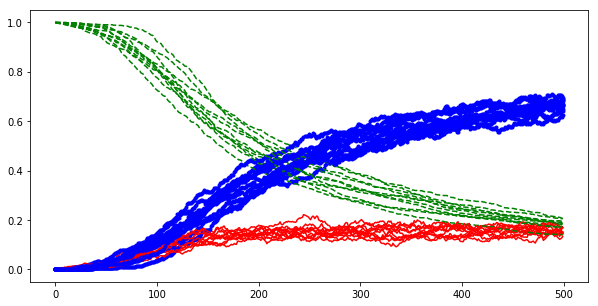

In [46]:
for file in memlogs:
    time_SIR_frac = [[0,0,0]]*(time + 1)
    time_SIR_frac = numpy.array(time_SIR_frac)
    SIR_dict = {'s' : 0, 'i':1, 'r': 2}

    with open(file, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if '#' in row[0]: continue
            if 'agent' in row: continue
            try:
                time_SIR_frac[int(float(row[1]))][SIR_dict[row[3]]] +=1
            except IndexError as e:
                print(e)
                print(row)
                break

        #list_of_tup.append((int(row[0]), int(row[1]), row[2], int(row[3])))
        #listup = [e[3] for e in [element for element in list_of_tup if element[2] == 'u']]
        #listdown = [e[3] for e in [element for element in list_of_tup if element[2] == 'd']]

        x = time_SIR_frac[1:] / N_USERS 
        t = range(time)
        if all(i >= 0.99 for i in [e[0] for e in x]) :
            print("point lost")
            continue
        #plt.figure()
        plt.plot(t, [e[0] for e in x], 'g--')
        plt.plot(t, [e[1] for e in x], 'r-')
        plt.plot(t, [e[2] for e in x], 'b.')
        plt.show